In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.mnist

In [9]:
(train_images, train_labels),(test_images, test_labels) = data.load_data()

In [10]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

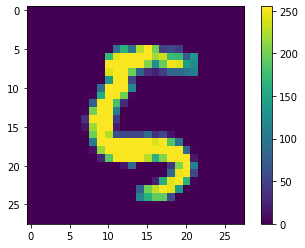

In [12]:
plt.figure
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
# images are in a arange of 0 - 255 , we will fit them in 0-1 for that...
train_images = train_images/255.0
test_images=test_images/255.0

In [14]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

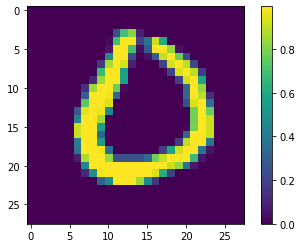

In [18]:
plt.figure
plt.imshow(train_images[2500])
plt.colorbar()
plt.grid(False)
plt.show()

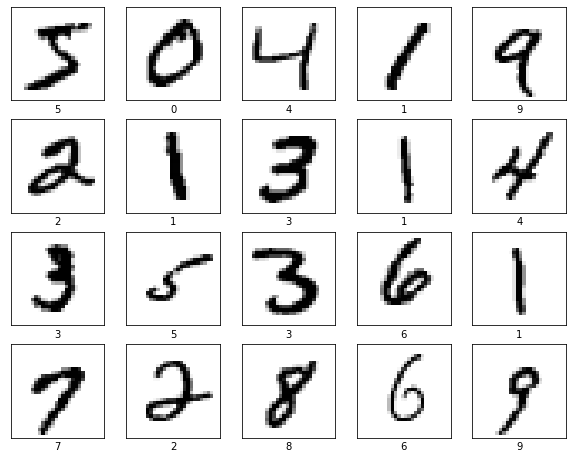

In [24]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()



In [26]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28,28)),                
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1115 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

In [31]:
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.0797 - accuracy: 0.9790


In [34]:
prob_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [35]:
pred=prob_model.predict(test_images)

In [42]:
pred[1000]

array([3.3920525e-10, 5.0285491e-09, 3.2083804e-12, 4.9508750e-03,
       7.3607312e-06, 3.7493728e-09, 3.9783698e-18, 2.7624852e-05,
       4.7824933e-10, 9.9501413e-01], dtype=float32)

In [43]:
np.argmax(pred[1000])

9

In [44]:
test_lables[1000]

9

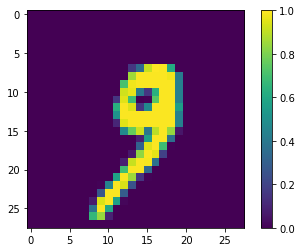

In [46]:
plt.figure
plt.imshow(test_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()